In [1]:
!pip install PyWavelets

In [4]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle
import imutils

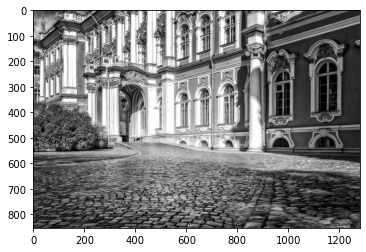

In [9]:
url = 'https://courses.openedu.ru/assets/courseware/v1/c268019f883825bbfc3a434023d9a06e/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/hermitage-3711588_1280.jpg'
image = cv2.cvtColor(imutils.url_to_image(url), cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')
plt.show()

In [10]:
wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

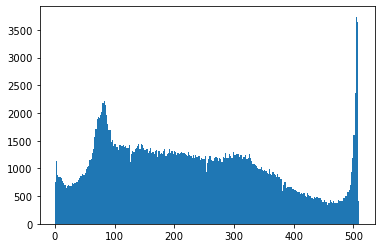

Max cA 3738.0
['9.00', '0.05', '0.03', '0.01', '0.06', '0.08']


In [26]:
hist_ca = plt.hist(cA.ravel(), bins = 256)
plt.show();
print('Max cA', np.max(hist_ca[0]))

a = [9.0, 0.052999999999999999, 0.032575399999999997, 0.010892799999999999, 0.055702500000000002, 0.079330300000000006]
print(["%0.2f" % i for i in a])

In [21]:
cA.shape

(427, 640)

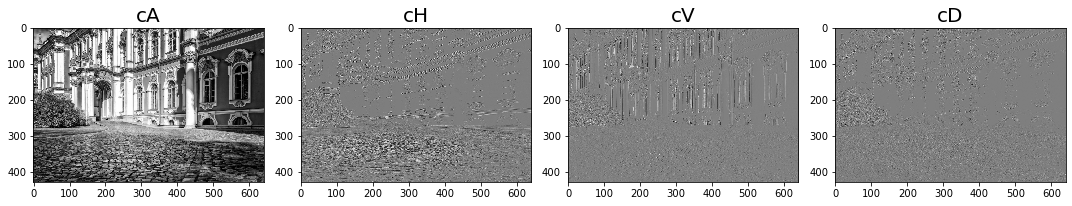

In [28]:
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(15, 7))
for i, a in enumerate([cA, cH, cV, cD]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap = 'gray')
    ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()


# Task 1

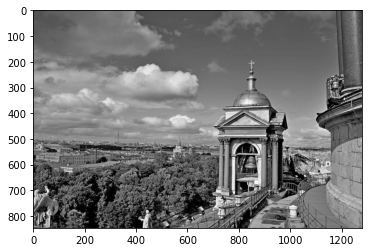

In [31]:
url = 'https://courses.openedu.ru/assets/courseware/v1/ca54904407995d200b1b9f5dd29031eb/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/peter-3794597_1280.jpg'
image = cv2.cvtColor(imutils.url_to_image(url), cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')
plt.show()

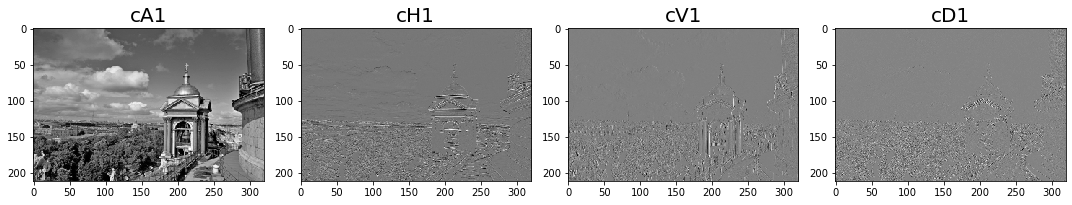

In [49]:
w, h = image.shape
wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

c1 = pywt.dwt2(cA, wavelet)
cA1, (cH1, cV1, cD1) = c1

titles = ['cA1', 'cH1', 'cV1', 'cD1']
fig = plt.figure(figsize=(15, 7))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap = 'gray')
    ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

In [50]:
print('The number of <40 in the set cA1 =',sum(sum(c1[0][m] == 0) for m in range(len(c1[0]))))
print((sum(sum(sum(c1[1][m][n] == 0) for n in range(len(c1[1][0]))) for m in range(len(c[1])))) + sum(sum(c1[0][m] == 0) for m in range(len(c1[0]))))

The number of <40 in the set cA1 = 80
2804


In [51]:
threshold = 40
h1 = cA1.shape[0] # all the sets have the form of a square matrix
for i in range(h1):
    c1[0][i][np.abs(c1[0][i])<threshold] = 0.0 # for cA
    for j in range(len(c1[1])):
        c1[1][j][i][np.abs(c1[1][j][i])<threshold] = 0.0  # for cH,cV,cD
print('The number of zeros =',(sum(sum(sum(c1[1][m][n] == 0) for n in range(h1)) for m in range(len(c1[1])))) + sum(sum(c1[0][m] == 0) for m in range(h1)))


The number of zeros = 174545


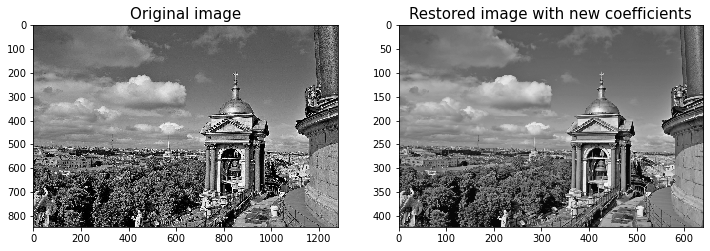

True

In [53]:
c_inverse1 = pywt.idwt2((c1),wavelet)[:h,:w]  # the coefficients are zeroed in the previous raw
titles1 = ['Original image', 'Restored image with new coefficients']
fig1 = plt.figure(figsize=(12, 6))
for i, a in enumerate([image,c_inverse1]):
  ax = fig1.add_subplot(1, 2, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles1[i], fontsize=15)
fig.tight_layout()
plt.show()
path = r'C:\Users\Victor\Downloads\c_inverse1.jpg'
cv2.imwrite(path, c_inverse1)

In [56]:
list_url = ['https://courses.openedu.ru/assets/courseware/v1/2375227a45059e6af590deb9c4cbadab/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/c1_337_peter-3794597_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/956dd84cb6aedb33323c35b89da2966f/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/c1_496_peter-3794597_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/78bf36b7e2a58c2dc1fa6700d7bc17b4/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/c1_644_peter-3794597_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/2375227a45059e6af590deb9c4cbadab/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/c1_812_peter-3794597_1280.jpg',
            'https://courses.openedu.ru/assets/courseware/v1/2c7256ddc1c54083158b12a779e10424/asset-v1:ITMOUniversity+IMAGPROCEN+spring_2021_ITMO_mag+type@asset+block/c1_853_peter-3794597_1280.jpg'
           ]
i = 0
target_image = cv2.imread(r'C:\Users\Victor\Downloads\c_inverse1.jpg')
for url in list_url:
    image = cv2.cvtColor(imutils.url_to_image(url), cv2.COLOR_BGR2GRAY)
    if image == target_image:
        plt.imshow(image)
        plt.show();
        print(i)
    i+=1    

<ipython-input-56-fa7e53601d58>:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if image == target_image:
